In [41]:
!pip install -q sentence-transformers scikit-learn matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [42]:
import pdfplumber
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import re


In [43]:
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text

# Upload or point to your file
pdf_path = "datastore/phi-basic.pdf"
raw_text = extract_text_from_pdf(pdf_path)
print(raw_text)  # Preview


P er s on al He alt h I ns u r anc e
Basic with Semi-Private Hospital
Series 9.01
SAMPLE
The following policy wording is provided solely for your convenience and reference. It is
incomplete and reflects only some of the general provisions that may be found in some of
our insurance policies. We periodically make changes to policy wording and therefore this
incomplete sample may not duplicate the wording of any actual issued policy. It is not to be
construed or interpreted in any manner as a contract or an offer to contract. The actual
policy issued to any given client will govern that relationship.
Sun Life Assurance Company of Canada agrees to provide the benefits of this policy according to its
terms and conditions.
In this document, you and your mean the owner of this policy. We, us, our, and the company mean
Sun Life Assurance Company of Canada.
Sun Life Assurance Company of Canada is the insurer, and is a member of the Sun Life
Financial group of companies.
Signed at Waterloo, Onta

In [44]:
# 🧠 Step 3: Initialize model
model = SentenceTransformer("all-MiniLM-L6-v2")  # Fast and good enough


In [46]:
# 🧩 Step 5: Split into sentences or paragraphs
sentences = [s.strip() for s in sample_text.strip().split("\n") if s.strip()]
for i, s in enumerate(sentences):
    print(f"{i+1}: {s}")


1: 1. The annual maximum for dental care is $750 per insured member.
2: 2. Orthodontic treatment is not covered under this plan.
3: 3. Vision coverage includes eye exams and basic lenses every 24 months.
4: 4. Laser eye surgery is not reimbursed.
5: 5. Drug reimbursement is 80% for generic medications only.
6: 6. Brand-name drugs require prior authorization.
7: 7. Hospitalization is covered for semi-private rooms only.
8: 8. Emergency room visits are covered with a $100 copayment.


In [47]:
def clean_and_split_sentences(text):
    # Remove headers/footers and extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Use basic sentence split (or use nltk/spacy for advanced)
    sentences = re.split(r'(?<=[.?!])\s+(?=[A-Z])', text)
    return [s.strip() for s in sentences if len(s.strip()) > 20]

sentences = clean_and_split_sentences(raw_text)
print(f"Total sentences: {len(sentences)}")


Total sentences: 210


In [48]:
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(sentences)


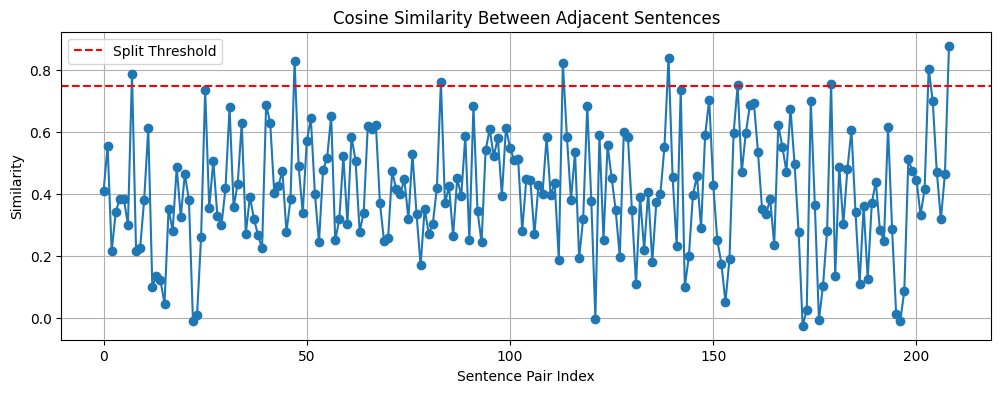

In [49]:
similarities = [cosine_similarity([embeddings[i]], [embeddings[i + 1]])[0][0] for i in range(len(embeddings) - 1)]

plt.figure(figsize=(12, 4))
plt.plot(similarities, marker='o')
plt.axhline(y=0.75, color='r', linestyle='--', label='Split Threshold')
plt.title("Cosine Similarity Between Adjacent Sentences")
plt.xlabel("Sentence Pair Index")
plt.ylabel("Similarity")
plt.grid(True)
plt.legend()
plt.show()


In [50]:
def semantic_chunk(sentences, embeddings, threshold=0.75):
    chunks = []
    current_chunk = [sentences[0]]

    for i in range(1, len(sentences)):
        sim = cosine_similarity([embeddings[i - 1]], [embeddings[i]])[0][0]
        if sim < threshold:
            chunks.append(" ".join(current_chunk))
            current_chunk = [sentences[i]]
        else:
            current_chunk.append(sentences[i])

    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks


In [51]:
chunks = semantic_chunk(sentences, embeddings, threshold=0.75)
print(f"\nGenerated {len(chunks)} semantic chunks.\n")

for i, chunk in enumerate(chunks, 1):
    print(f"📌 Chunk {i}:\n{chunk[:500]}...\n")



Generated 201 semantic chunks.

📌 Chunk 1:
P er s on al He alt h I ns u r anc e Basic with Semi-Private Hospital Series 9.01 SAMPLE The following policy wording is provided solely for your convenience and reference....

📌 Chunk 2:
It is incomplete and reflects only some of the general provisions that may be found in some of our insurance policies....

📌 Chunk 3:
We periodically make changes to policy wording and therefore this incomplete sample may not duplicate the wording of any actual issued policy....

📌 Chunk 4:
It is not to be construed or interpreted in any manner as a contract or an offer to contract....

📌 Chunk 5:
The actual policy issued to any given client will govern that relationship....

📌 Chunk 6:
Sun Life Assurance Company of Canada agrees to provide the benefits of this policy according to its terms and conditions....

📌 Chunk 7:
In this document, you and your mean the owner of this policy....

📌 Chunk 8:
We, us, our, and the company mean Sun Life Assurance Company o

In [52]:
!pip install sentence-transformers scikit-learn nltk spacy
!python -m nltk.downloader punkt
!python -m spacy download en_core_web_sm


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nandhinirajasekaran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.3 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [53]:
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_sent_tokenize(text):
    doc = nlp(text)
    return [sent.text.strip() for sent in doc.sents]


In [54]:
import os
import re
import json
from langchain.document_loaders import PyPDFLoader
from langchain_openai import OpenAI
#from langchain.prompts import PromptTemplate
from langchain_core.prompts import PromptTemplate

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('punkt')
#from nltk.tokenize import sent_tokenize
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage

load_dotenv()

# Configuration
DOCS_DIR = "datastore/"
#llm = OpenAI(model_name="gpt-3.5-turbo", temperature=0.7)
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.7)
embedder = SentenceTransformer("all-MiniLM-L6-v2")

from langchain_core.prompts import PromptTemplate

# Prompt template
qa_prompt = PromptTemplate(
    input_variables=["chunk", "metadata"],
    template="""
    Generate 2-3 QA pairs for the chunk: {chunk}
    Metadata: {metadata}
    Output as JSON: [{"question": "...", "answer": "..."}, ...]
    Focus on insurance policy details (e.g., reimbursement, maximums, exclusions).
    """
)

# Templates
question_templates = [
    {"question": "What is the {entity} reimbursement rate for the {plan_type} plan?", "entity_key": r"(\w+)\s+reimbursement"},
    {"question": "What is the annual maximum for {entity} in the {plan_type} plan?", "entity_key": r"maximum of \$([\d,]+)"}
]

# Chunking helpers
def semantic_chunk(text, threshold=0.75):
    sentences = spacy_sent_tokenize(text)
    if not sentences:
        return []

    embeddings = embedder.encode(sentences)
    chunks = []
    current_chunk = [sentences[0]]

    for i in range(1, len(sentences)):
        sim = cosine_similarity([embeddings[i - 1]], [embeddings[i]])[0][0]
        if sim < threshold:
            chunks.append(" ".join(current_chunk))
            current_chunk = [sentences[i]]
        else:
            current_chunk.append(sentences[i])

    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks

# Chunk classification
def is_complex_chunk(text):
    return bool(re.search(r'exclusion|limitation|condition', text, re.IGNORECASE))

# QA generation
def generate_template_qa(text, metadata):
    qa_pairs = []
    entities = re.findall(r'(\w+)\s+reimbursement|maximum of \$([\d,]+)', text, re.IGNORECASE)
    for entity in entities:
        for template in question_templates:
            if re.search(template["entity_key"], text, re.IGNORECASE):
                ent = entity[0] or entity[1]
                question = template["question"].format(entity=ent, plan_type=metadata["plan_type"])
                qa_pairs.append({"question": question, "answer": text[:200]})
    return qa_pairs

    
import json

def generate_llm_qa(text, metadata):
    try:
        #formatted_prompt = qa_prompt.format_prompt(chunk=text[:1000],metadata=json.dumps(metadata)).to_string()

        qa_prompt_template = """
        Generate 2-3 QA pairs for the chunk: {chunk}
        Metadata: {metadata}
        Output as JSON: [{{"question": "...", "answer": "..."}}, ...]
        Focus on insurance policy details.
        """

        formatted_prompt = qa_prompt_template.format(
            chunk=text[:1000],
            metadata=json.dumps(metadata)
        )
        #formatted_prompt = qa_prompt.format(chunk=str(text)[:1000], metadata=metadata)

        print("formatted_prompt:",formatted_prompt)
        #response = llm(formatted_prompt)
        response = llm([HumanMessage(content=formatted_prompt)])
        response = llm([HumanMessage(content=formatted_prompt)]).content



        print("🧾 Raw LLM response:\n", response)

        try:
            data = json.loads(response)
            if isinstance(data, list):
                return data
            else:
                print("⚠️ LLM returned non-list JSON:", data)
        except json.JSONDecodeError:
            start = response.find('[')
            end = response.rfind(']') + 1
            if start != -1 and end != -1:
                try:
                    return json.loads(response[start:end])
                except Exception as e:
                    print("⚠️ Failed JSON slice parse:", e)
            print("⚠️ Could not extract JSON list")
    except Exception as e:
        print(f"⚠️ LLM QA generation failed: {e}")

    return []  # Safe fallback


# Main loop
qa_dataset = []
for pdf_file in os.listdir(DOCS_DIR):
    if not pdf_file.endswith(".pdf"):
        continue
    print(f"Processing: {pdf_file}")
    file_path = os.path.join(DOCS_DIR, pdf_file)
    loader = PyPDFLoader(file_path)
    pages = loader.load()
    plan_type = "basic" if "basic" in pdf_file.lower() else "standard" if "standard" in pdf_file.lower() else "enhanced"

    for page in pages:
        raw_text = page.page_content.strip()
        semantic_chunks = semantic_chunk(raw_text)
        #print(semantic_chunks)
        for chunk_text in semantic_chunks:
            metadata = {
                "plan_type": plan_type,
                "source_file": pdf_file
            }
            qa_pairs = generate_llm_qa(chunk_text, metadata) if is_complex_chunk(chunk_text) else generate_template_qa(chunk_text, metadata)
            for qa in qa_pairs:
                if isinstance(qa, dict) and "question" in qa and "answer" in qa:
                    qa_dataset.append({
                        "question": qa["question"],
                        "answer": qa["answer"],
                        "source_file": pdf_file,
                        "plan_type": plan_type
                    })
                else:
                    print("⚠️ Skipping malformed QA item:", repr(qa))

# Save to disk
with open("raft_qa_dataset_semantic.json", "w") as f:
    json.dump(qa_dataset, f, indent=2)

print(f"✅ Generated {len(qa_dataset)} QA pairs using semantic chunking.")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nandhinirajasekaran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Processing: phi-basic.pdf
formatted_prompt: 
        Generate 2-3 QA pairs for the chunk: PHI Basic with Semi-Private Hospital Policy Sample Series 9.01 2023  
Sun Life Assurance Company of Canada agrees to provide the benefits of this policy according to its 
terms and conditions.
        Metadata: {"plan_type": "basic", "source_file": "phi-basic.pdf"}
        Output as JSON: [{"question": "...", "answer": "..."}, ...]
        Focus on insurance policy details.
        
🧾 Raw LLM response:
 [
{"question": "What benefits does Sun Life Assurance Company of Canada agree to provide under this policy?", "answer": "Sun Life Assurance Company of Canada agrees to provide the benefits of this policy according to its terms and conditions."},
{"question": "What is the plan type of the PHI Basic with Semi-Private Hospital Policy Sample Series 9.01 2023?", "answer": "The plan type is basic."},
{"question": "Where can the detailed terms and conditions of this policy be found?", "answer": "The detai